## Question 1: 

Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

In [76]:
import pandas as pd #to read the file and to analyze the data
from scipy import stats #to calculate trimmed mean
import matplotlib.pyplot as plt #to plot the histogram

df = pd.read_excel ('/Users/ezgiosmanoglu/Desktop/Shopify_Challenge.xlsx')
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


In [16]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

Average order value of \\$3145.13 is calculated by using the simple mean of the order_amount column. However, order amounts are usually lower than this value, and it points out there might be outliers in data that affects the mean. We can also see that the standard deviation is quite large, which supports our idea of big outliers affecting the mean. Other information from summary statistics shows that 75\% of the "order_amount" (75th percentile) is lower than $390. 

In [33]:
breaks = (500,1000,1500,3000,4500,6000,10000,100000,1000000)
a=0
for x in breaks:
    if df.loc[df['order_amount'].between(a,x), 'order_amount'].count() >0:
        print('Number of orders between' , a , 'and' , x , ' is:',  df.loc[df['order_amount'].between(a,x), 'order_amount'].count())
    a = x


Number of orders between 0 and 500  is: 4364
Number of orders between 500 and 1000  is: 565
Number of orders between 1000 and 1500  is: 7
Number of orders between 1500 and 3000  is: 1
Number of orders between 10000 and 100000  is: 44
Number of orders between 100000 and 1000000  is: 19


We also check quickly the numbers of orders between some specified order amounts. We see that $(4364+565)/5000 = 98.6\%$ of the orders has an amount lower than \\$1000.

b. What metric would you report for this dataset?

As the simple mean is greatly affected by the outliers, and doesn't represent the true value of the mean, I think about few other metrics that can be used. One is truncated mean, which is actually a trimmed mean from one side. As almost 98.6% of order amount values are below $1000, we can look at the mean where the outliers are excluded. The other option is to use the median, as the median is not affected by the outliers and gives a good insight about where the data is centered.

In [72]:
stats.trim1(df['order_amount'], proportiontocut=0.014, tail='right').mean()

301.2174442190669

In [73]:
df['order_amount'].median()

284.0

Our calculation shows that the median value is \\$284, and the trimmed mean is roughly $301. We also check the distribution of the data without the outliers. The graph below shows the distribution of the data after removing the outliers, and check where median and the mean fall on. The red dashed line represents the trimmed mean, while the black dashed line is where median lies. As both values are pretty close to each other, and trimmed mean is a better representation of the average order value without the outliers, I would use the trimmed mean of the data without the outliers.

In [74]:
df_exc = df[df['order_amount'] < 1000]

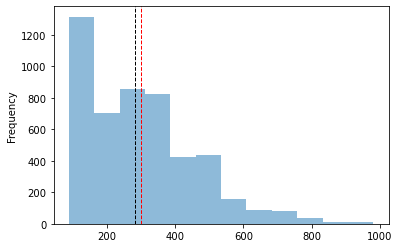

In [75]:
df_exc['order_amount'].plot.hist(bins=12, alpha=0.5)
plt.axvline(df['order_amount'].median(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(stats.trim1(df['order_amount'], proportiontocut=0.014, tail='right').mean(), color='red', linestyle='dashed', linewidth=1)

c. What is its value?

The value of the trimmed mean is \\$301.2 .

## Question 2:
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a. How many orders were shipped by Speedy Express in total?

54

In [ ]:
SELECT COUNT(*) FROM [Orders]
LEFT JOIN Shippers on Shippers.ShipperID = Orders.ShipperID
WHERE ShipperName = "Speedy Express"

b. What is the last name of the employee with the most orders?

Peacock

In [ ]:
SELECT MAX(count), Employees.Lastname
FROM (SELECT COUNT(OrderID) as count,EmployeeID FROM [Orders]
GROUP BY EmployeeID) A
JOIN Employees on Employees.EmployeeID = A.EmployeeID 

c. What product was ordered the most by customers in Germany?

Boston Crab Meat

In [ ]:
SELECT Max(Total), ProductName
FROM (SELECT ProductID, SUM(Quantity) as Total FROM [Orders]
JOIN Customers ON Orders.CustomerID = Customers.CustomerID
JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
WHERE Country = "Germany"
Group BY ProductID) A
Join Products P ON A.ProductID = P.ProductID